In [167]:
# Import libraries
import locale
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [168]:
# Set file paths
whale_returns_path = Path("../Resources/whale_returns.csv")
algo_returns_path = Path("../Resources/algo_returns.csv")
sp500_history_path = Path("../Resources/sp500_history.csv")

# Read the individual CSV datasets
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [169]:
# Reading whale returns
whale_returns.head()
whale_returns.isnull().sum()

# Drop the first row as it's the only row with null values
whale_returns.dropna(inplace=True)

# Reading algo returns
algo_returns.head()
algo_returns.isnull().sum()

# Drop the nulls
algo_returns.dropna(inplace=True)

# Reading S&P 500 Closing Prices and sort by index
sp500_history.head()
sp500_history.isnull().sum()
sp500_history.sort_index(inplace=True)
sp500_history.dtypes

# Strip the $ from the string and convert to float (This code was referenced at https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas)
locale.setlocale(locale.LC_ALL,'')
sp500_history['Close'] = sp500_history.Close.map(lambda x: locale.atof(x.strip('$')))

# Add Daily Returns column and calculate
sp500_history['S&P 500'] = sp500_history['Close'].pct_change()

# Drop nulls
sp500_history.dropna(inplace=True)

# Drop Close prices from sp500_history and drop percent change from returns
sp500_returns = sp500_history.drop(['S&P 500'], axis= 1)
sp500_history = sp500_history.drop(['Close'], axis= 1)

In [170]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_history], axis='columns',join='inner')

In [171]:
# Calculate Daily Returns
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

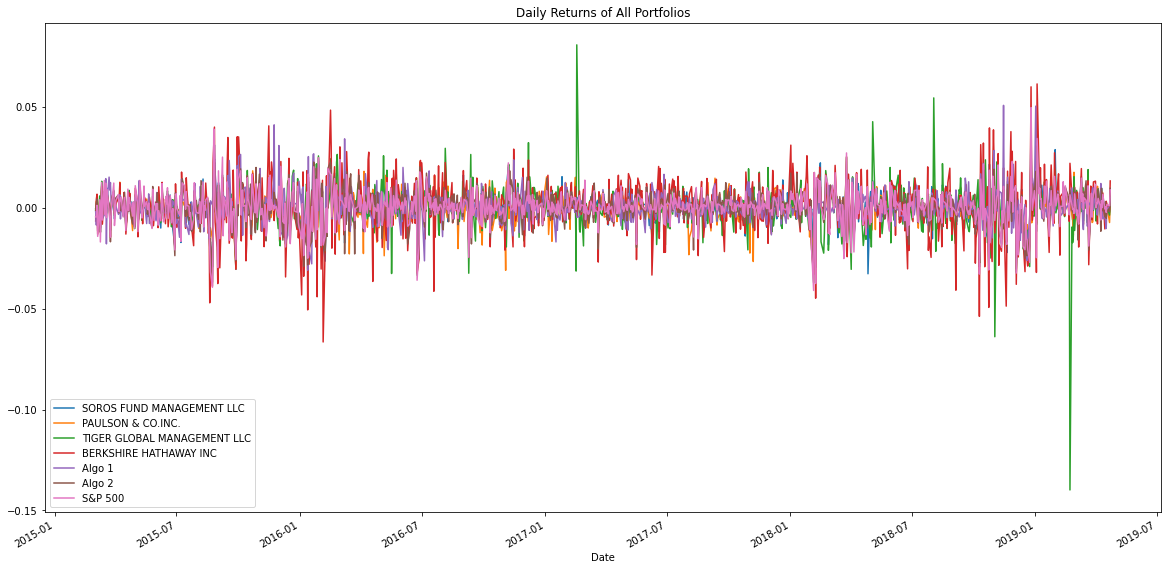

In [172]:
combined_df.plot(figsize=(20,10), title='Daily Returns of All Portfolios')

<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

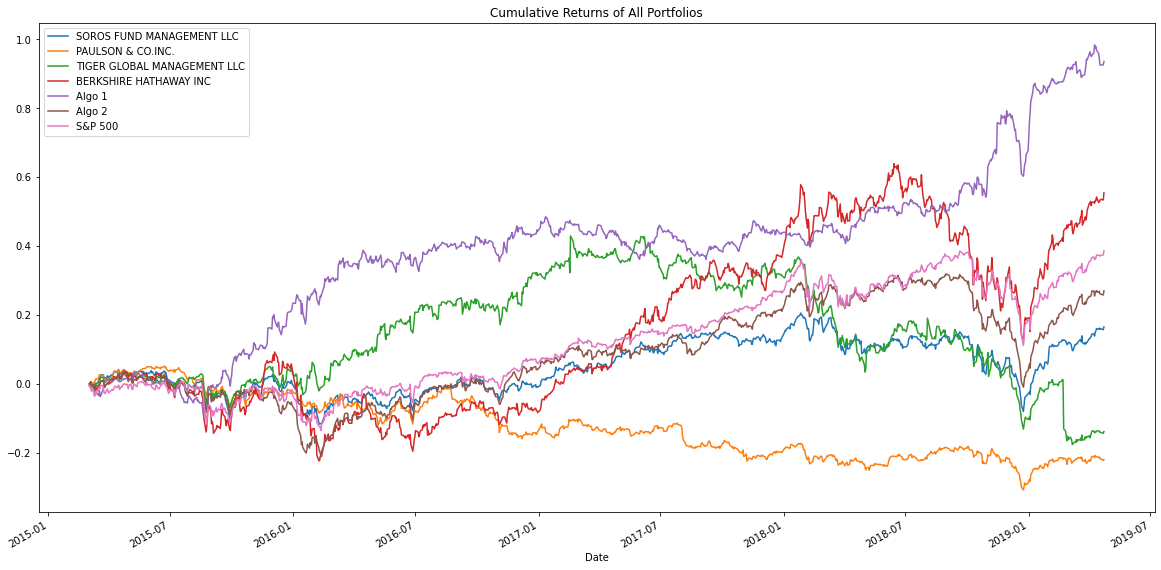

In [173]:
# Calculate and plot cumulative returns
cumulative_returns = (1+combined_df).cumprod()-1
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns of All Portfolios')

<AxesSubplot:>

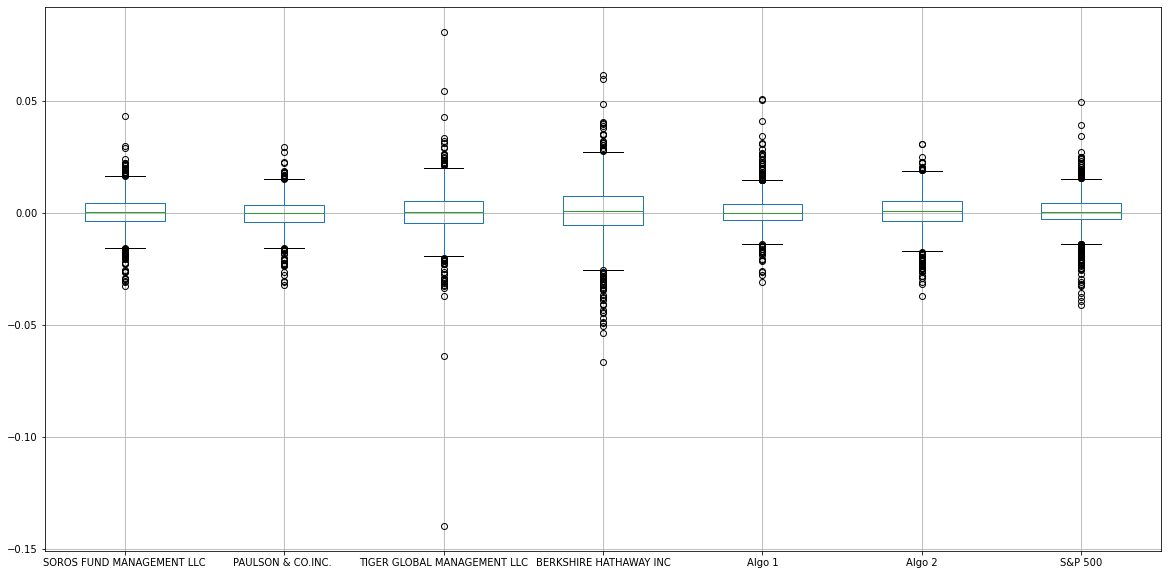

In [174]:
# Create a box plot for each portfolio
combined_df.boxplot(figsize=(20,10))

In [175]:
# Calculate the standard deviation for all portfolios
daily_st_devs = combined_df.std()


In [176]:
# Determine which portolios are riskier than the S&P 500
## Using standard deviation as our only indicator of risk, we can see that only two portfolios are riskier than the S&P 500. Namely, Berkshire Hathaway and Tiger Global Management, which have daily standard deviations of 0.012919 and 0.010894, respecitively. The other 4 portfolios are less risky because they have less standard deviation than the index.

In [177]:
# Calculate annualized standard deviation
annual_st_devs = combined_df.std()*np.sqrt(252)
annual_st_devs

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

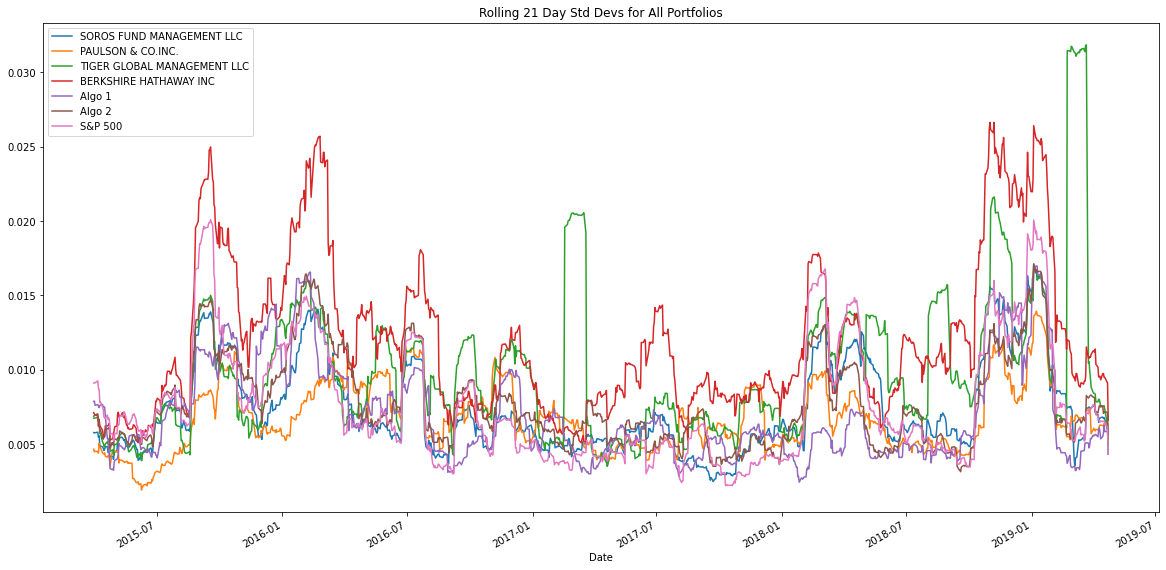

In [178]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
rolling_21_day_st_devs = combined_df.rolling(window=21).std().plot(figsize=(20,10), title='Rolling 21 Day Std Devs for All Portfolios')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


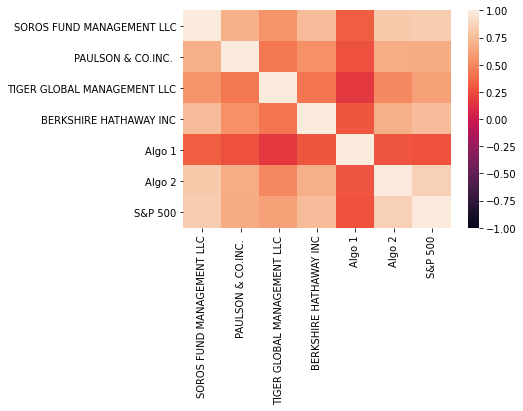

In [179]:
#Calculate and plot the correlation
correlation = combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

## Based on the heatmap and table representing correlation, Algo 2, Soros Fund Management and Berkshire Hathaway, all have high correlations to the S&P 500, at .859, .838 and .751, respecitvely. 

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Tiger Global'}, xlabel='Date'>

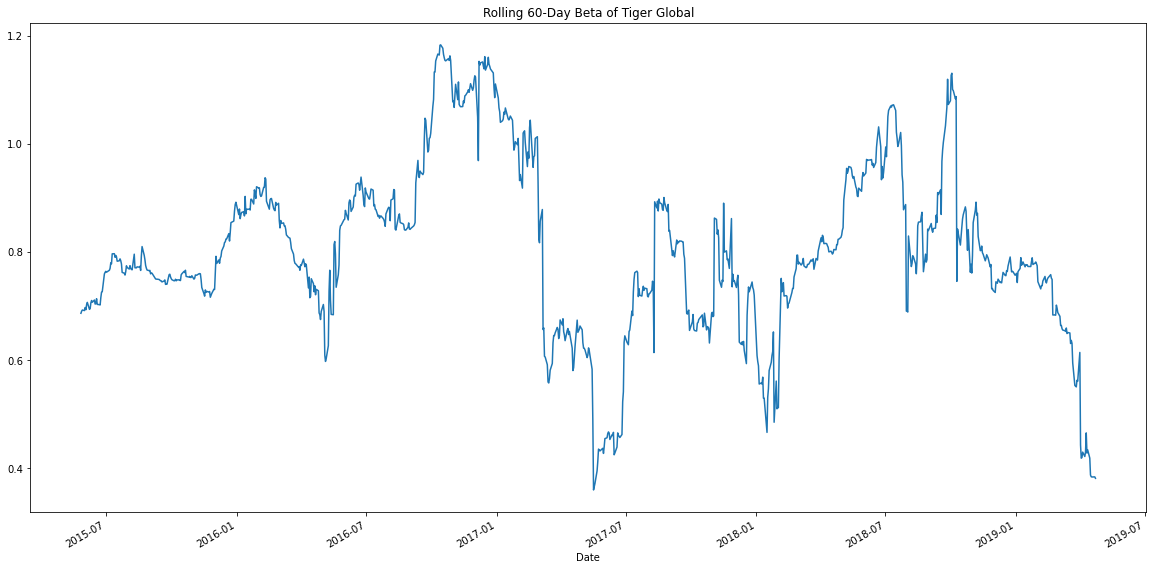

In [180]:
# Caluclate and plot the 60 day rolling beta between a chosen portfolio (Tiger) and the S&P 500
rolling_covar = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_sp_var = combined_df['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covar / rolling_sp_var
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Tiger Global')

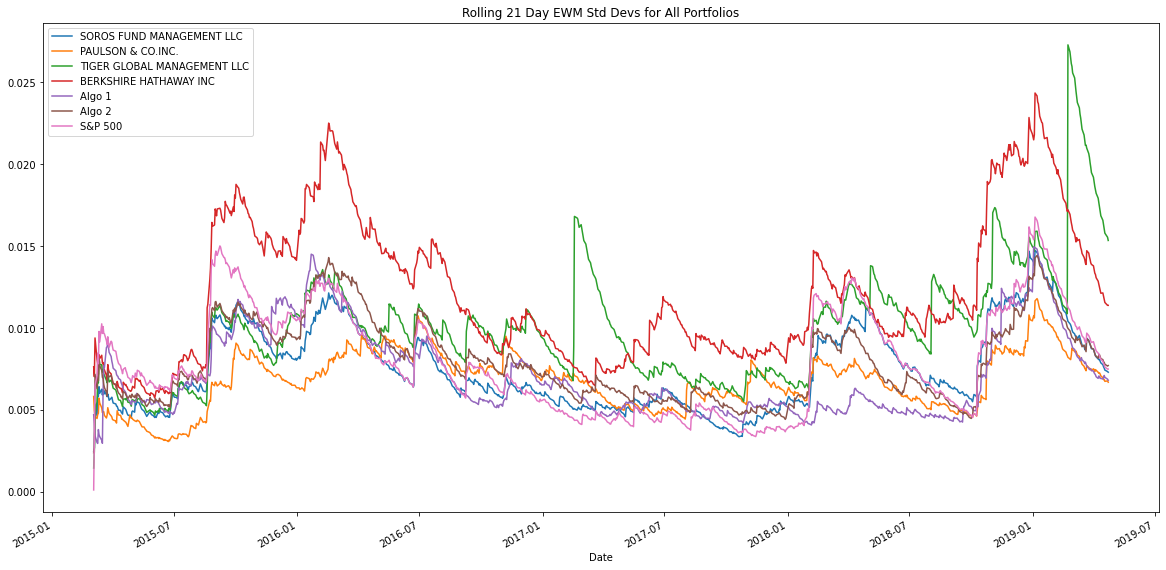

In [181]:
# Rolling Statistics Challenge: Exponentially Weighted Moving Average
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day ewm.
exp_rolling_21_day_st_devs = combined_df.ewm(halflife=21).std().plot(figsize=(20,10), title='Rolling 21 Day EWM Std Devs for All Portfolios')


<AxesSubplot:title={'center':'Rolling Exp Weighted 60-Day Beta of Tiger Global'}, xlabel='Date'>

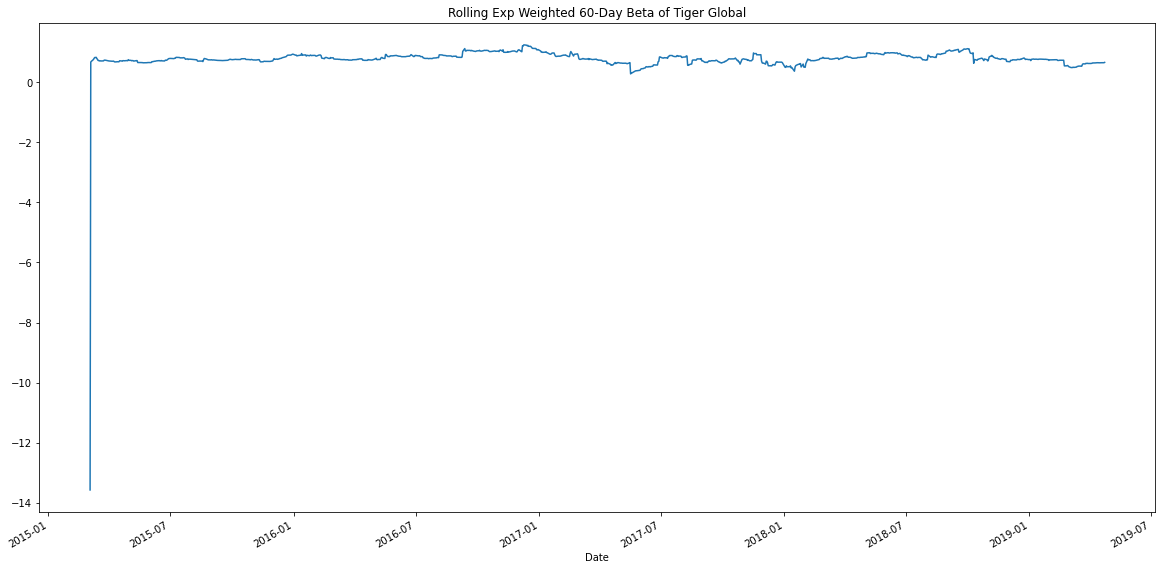

In [183]:
# Choose one portfolio, then calculate and plot the 60-day ewm rolling beta between it and the S&P 500.
rolling_exp_covar = combined_df['TIGER GLOBAL MANAGEMENT LLC'].ewm(halflife=21).cov(combined_df['S&P 500'])
rolling_exp_sp_var = combined_df['S&P 500'].ewm(halflife=60).var()
rolling_exp_beta = rolling_exp_covar / rolling_exp_sp_var
rolling_exp_beta.plot(figsize=(20,10), title='Rolling Exp Weighted 60-Day Beta of Tiger Global')

,Sharpe
SOROS FUND MANAGEMENT LLC,0.356417
PAULSON & CO.INC.,-0.483570
TIGER GLOBAL MANAGEMENT LLC,-0.121060
BERKSHIRE HATHAWAY INC,0.621810
Algo 1,1.378648
Algo 2,0.501364
S&P 500,0.648267


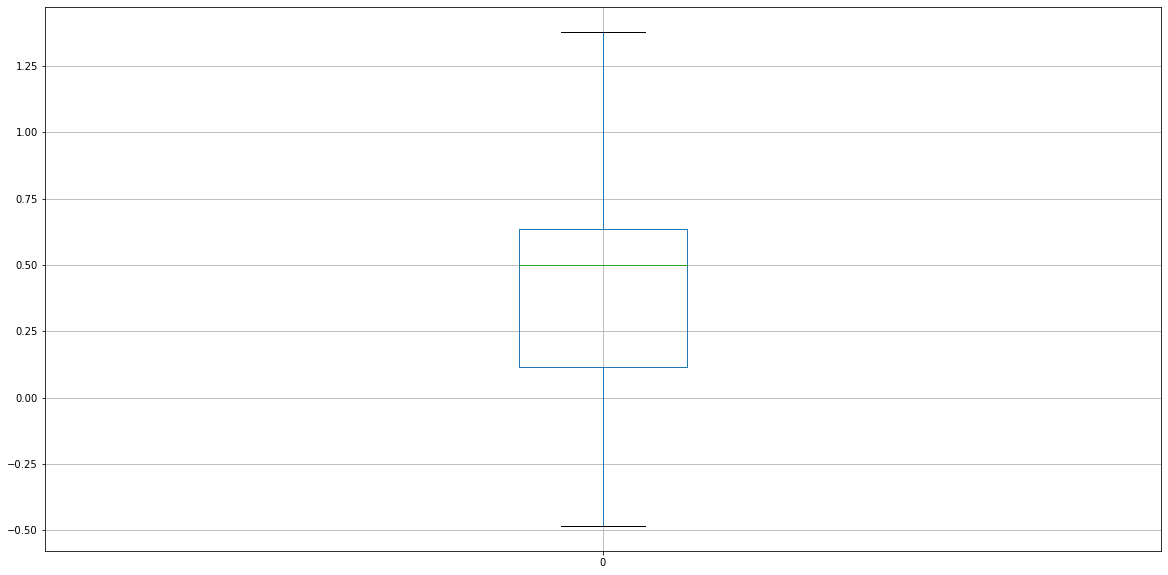

In [184]:
# Calculate sharpe ratios
sharpe_ratios = (combined_df.mean()*252) / (combined_df.std()* np.sqrt(252))
#sharpe_ratios.plot.box(figsize=(20,10))
sharpe_ratios = sharpe_ratios.to_frame()
sharpe_ratios.boxplot(figsize=(20,10))
sharpe_ratios.rename(columns={0:'Sharpe'}, inplace=True)
sharpe_ratios

In [185]:
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
## As we can see from the displayed dataframe and the boxplot, Algo 1 with a sharpe ratio of 1.38 well-outperformed the S&P, whose sharpe ratio was 0.65. All the other portfolios underperfomed. 

In [187]:
# Read in the csv you created with Google Sheets as a new dataframe
portfolio_path = Path("../Resources/portfolio.csv")
portfolio = pd.read_csv(portfolio_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
portfolio

# Check for nulls
portfolio.isnull().sum()

# Calculate the weighted returns for your portfolio, assuming equal weighting per stock.
weights = [.25,.25,.25,.25,.25]
portfolio_returns = portfolio.pct_change()
portfolio_returns = portfolio_returns.dot(weights)
portfolio_returns = portfolio_returns.to_frame()

# Add portfolio to the combined_df
all_returns = pd.concat([combined_df, portfolio_returns], axis='columns',join='inner')
all_returns = all_returns.rename(columns={0:'Cust Port'})
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Cust Port
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.009073
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.007920
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.007628
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015336
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004618
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,-0.006551
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.006220
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000484


In [188]:
# Run analyses
# Annualized Std Dev
daily_st_devs = all_returns.std()
annual_st_devs = all_returns.std()*np.sqrt(252)
annual_st_devs

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.135787
Cust Port                      0.289992
dtype: float64

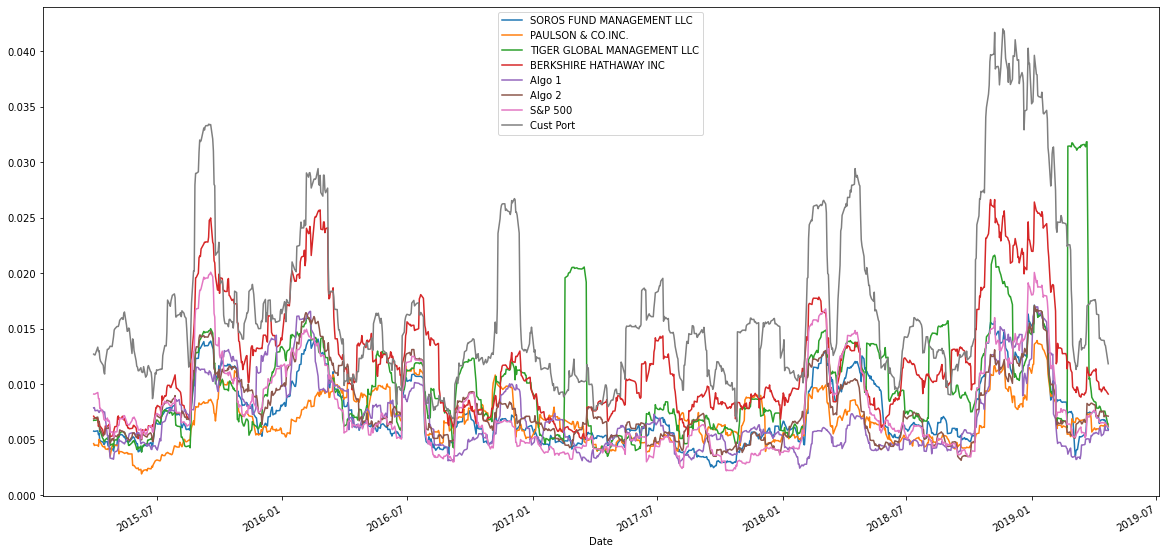

In [189]:
# Rolling std dev with 21 day window
rolling_21_day_st_devs = all_returns.rolling(window=21).std().plot(figsize=(20,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Cust Port
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.837731,0.694979
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.669636,0.510469
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,0.623776,0.462774
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,0.751137,0.758041
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,0.279130,0.242546
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,0.858620,0.666066
S&P 500,0.837731,0.669636,0.623776,0.751137,0.279130,0.858620,1.000000,0.791446
Cust Port,0.694979,0.510469,0.462774,0.758041,0.242546,0.666066,0.791446,1.000000


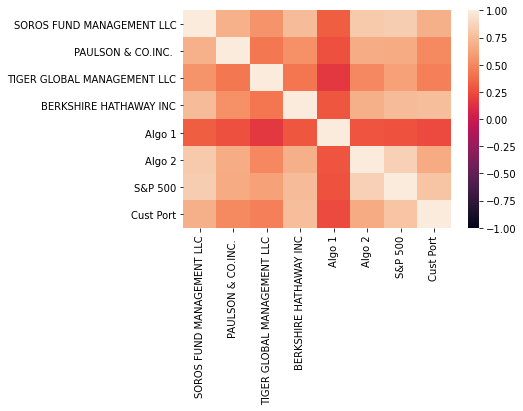

In [190]:
# Caluculate and Plot the correlation
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio vs. S&P 60 TSX'}, xlabel='Date'>

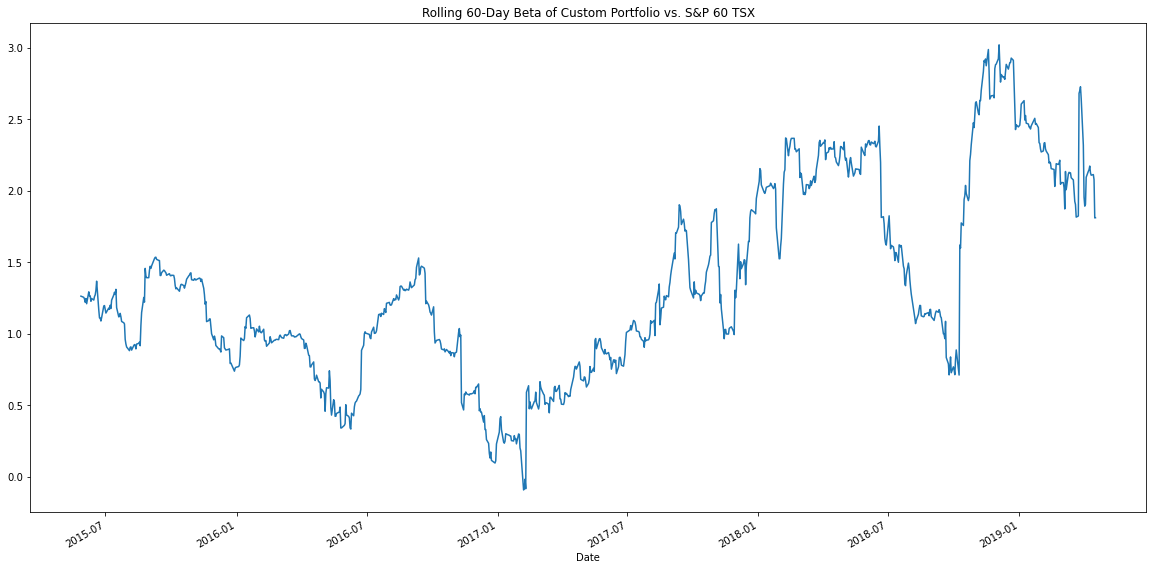

In [191]:
# Caluclate and plot beta for my portfolio compared to S&P TSX
# After using Google Sheets to pull the data and save it to a csv, read it into a dataframe
tsx_path = Path("../Resources/TSX.csv")
tsx = pd.read_csv(tsx_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
tsx

tsx_returns = tsx.pct_change()

# Combine tsx_returns with portfolio_returns
tsx_and_port = pd.concat([portfolio_returns, tsx_returns], axis='columns',join='inner')
tsx_and_port = tsx_and_port.rename(columns={0:'Cust Port', 'Close':'S&P 60 TSX'})

# Remove null values
tsx_and_port.dropna(inplace=True)

# Caluclate and plot the 60 day rolling beta between my portfolio and the S&P TSX
rolling_covar = tsx_and_port['Cust Port'].rolling(window=60).cov(tsx_and_port['S&P 60 TSX'])
rolling_tsx_var = tsx_and_port['S&P 60 TSX'].rolling(window=60).var()
rolling_beta = rolling_covar / rolling_tsx_var
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Custom Portfolio vs. S&P 60 TSX')


,Sharpe
SOROS FUND MANAGEMENT LLC,0.342894
PAULSON & CO.INC.,-0.491422
TIGER GLOBAL MANAGEMENT LLC,-0.130186
BERKSHIRE HATHAWAY INC,0.606743
Algo 1,1.369589
Algo 2,0.484334
S&P 500,0.633139
Cust Port,1.415929


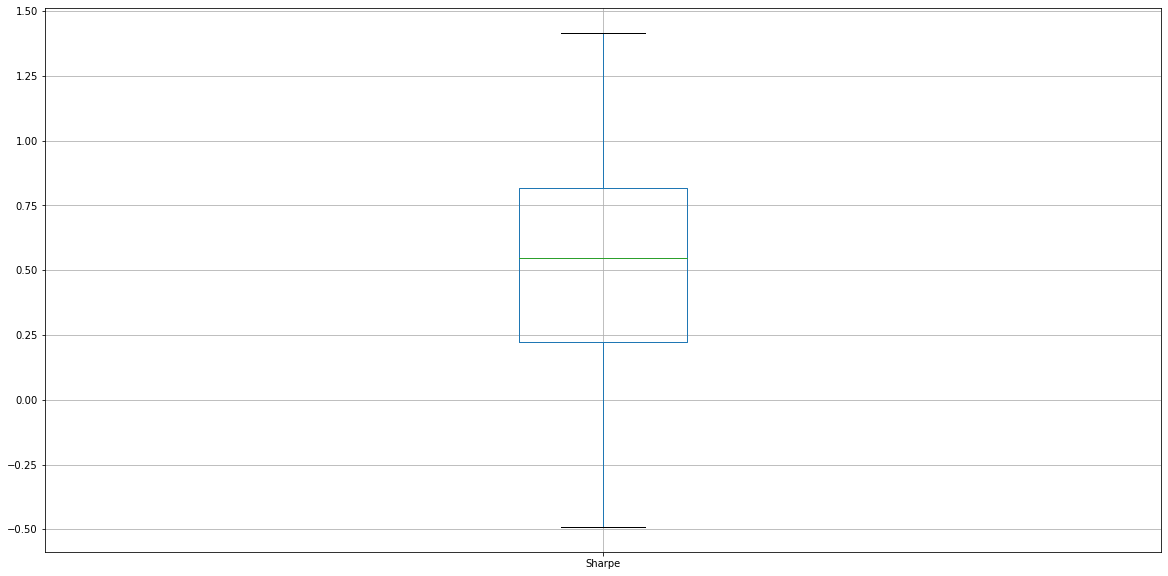

In [192]:
# Calculate the Sharpe ratios and generate a bar plot
cust_port_sharpe_ratios = (all_returns.mean()*252) / (all_returns.std()* np.sqrt(252))
cust_port_sharpe_ratios = cust_port_sharpe_ratios.to_frame()
cust_port_sharpe_ratios.rename(columns={0:'Sharpe'}, inplace=True)
cust_port_sharpe_ratios.boxplot(figsize=(20,10))
cust_port_sharpe_ratios

In [193]:
# Based on the above Sharpe ratios, my portfolio performed extreamly well compared to the S&P 500.
# My Sharpe ratio was 1.42 vs the S&P 500 at 0.63. The next highest portfolio was Algo 1 with 1.37.
# Furthermore, the median portfolio had a Sharpe of 0.55, and the worst portfolio had -0.49.
# Clearly my portfolio was the clear winner in terms of risk vs. reward